In [137]:
import pandas as pd
df_gd = pd.read_csv('hiveGuard/Validation/ground_true.csv')

In [138]:
threshold = 0
x = []
y = []

In [139]:
for i in range(0,10):
    threshold = i
    ## precision == true positive / (true positve + false positive)

    ## Recall == True Positive / (True Positive + False Negative)

    df = pd.read_csv('hiveGuard/Validation/horneBee_fromColab/hornetBee_'
                     +str(threshold)+'/Detection_Results.csv')

    df = df[df.label==0]

    TP = 0
    FN = 0
    FP = 0

    for image in set(df_gd.image):

        count_gd = df_gd[df_gd.image==image].count()['image']
        count_pred = df[df.image==image].count()['image']

        if count_gd >= count_pred:

            TP += count_pred
            FN += (count_gd - count_pred)  

        else: 
            TP += count_gd
            FP += (count_pred - count_gd)

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    y.append(precision)
    x.append(recall)

In [142]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Precision-Recall Curve')

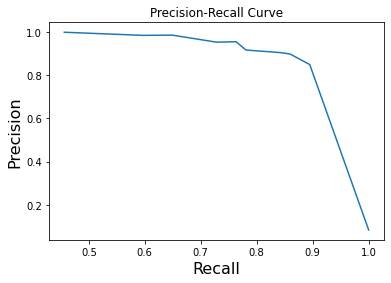

In [148]:
plt.plot(x,y)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision-Recall Curve")